/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_5 (Masking)                  │ (None, 59, 6)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 59, 128)             │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 59, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,179 (469.45 KB)

 Trainable params: 120,179 (469.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - loss: 0.2689 - mean_absolute_error: 0.4522 - mean_squared_error: 0.2689 - val_loss: 0.0165 - val_mean_absolute_error: 0.1175 - val_mean_squared_error: 0.0165
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0287 - mean_absolute_error: 0.1339 - mean_squared_error: 0.0287 - val_loss: 0.0165 - val_mean_absolute_error: 0.1136 - val_mean_squared_error: 0.0165
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0172 - mean_absolute_error: 0.1094 - mean_squared_error: 0.0172 - val_loss: 0.0342 - val_mean_absolute_error: 0.1571 - val_mean_squared_error: 0.0342
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0472 - mean_absolute_error: 0.1855 - mean_squared_error: 0.0472 - val_loss: 0.0518 - val_mean_absolute_error: 0.2066 - val_mean_squared_error: 0.0518
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0339 - mean_absolute_error: 0.1522 - mean_squared_error: 0.0339 - val_loss: 0.0246 - val_mean_absol

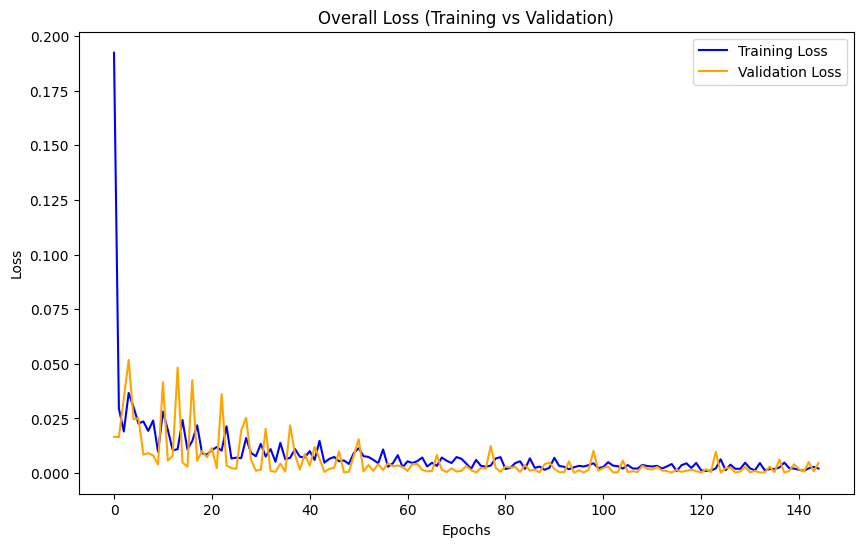

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
Heart Rate Prediction MSE: 0.904451257866139
Heart Rate Prediction MAE: 0.8501069810655397
Heart Rate Prediction R²: 0.992569923743696


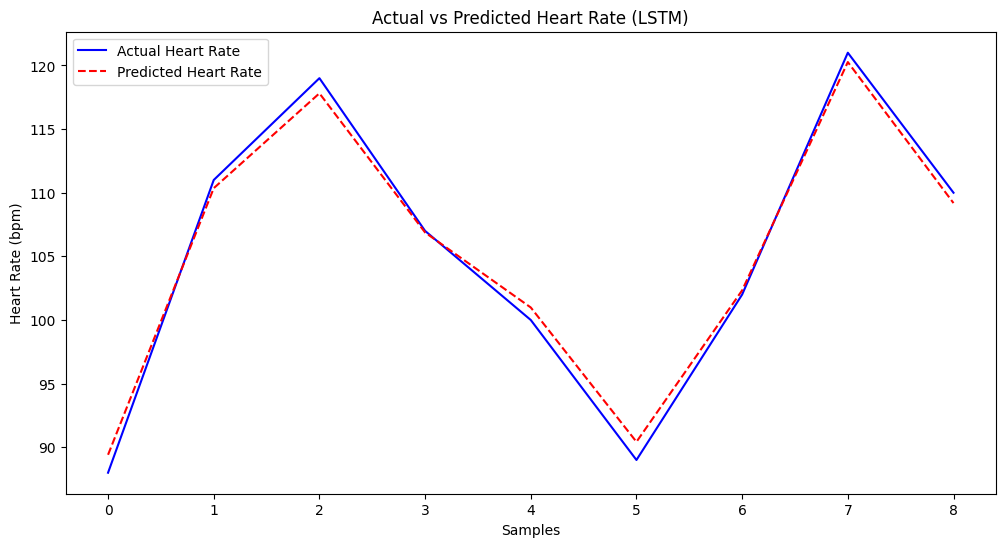

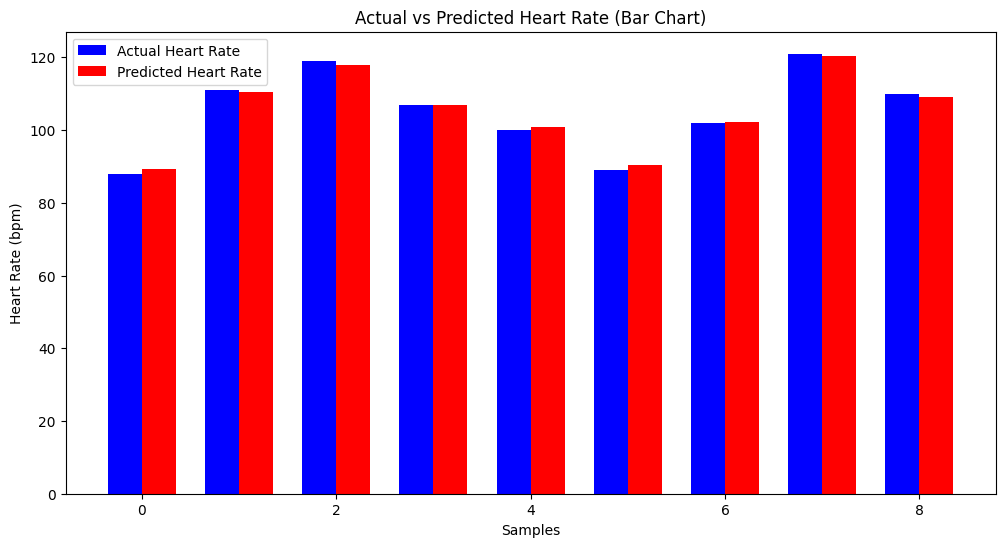

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
Predicted Heart Rate for new data: 98.78 bpm


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. 파일 경로 목록 설정
file_paths = [
    '/content/exercise_1.csv', '/content/exercise_2.csv', '/content/exercise_3.csv',
    '/content/exercise_4.csv', '/content/exercise_5.csv', '/content/exercise_6.csv',
    '/content/exercise_7.csv', '/content/exercise_8.csv', '/content/exercise_9.csv',
    '/content/exercise_10.csv', '/content/exercise_11.csv'
]

# 2. 파일 읽기 및 데이터 병합
data_list = []
for file_path in file_paths:
    data = pd.read_csv(file_path)

    # 필요한 열 선택 (시간, 심박수, 상태, 심박수 변화, ID, RPE)
    data = data[['time', 'heart_rate', 'state', 'heart_rate_change', 'id', 'rpe']]
    data_list.append(data)

all_data = pd.concat(data_list)

# 3. 데이터 스케일링
time_scaler = MinMaxScaler(feature_range=(0, 1))
all_data['time_scaled'] = time_scaler.fit_transform(all_data[['time']])

hr_scaler = MinMaxScaler(feature_range=(0, 1))
all_data['heart_rate_scaled'] = hr_scaler.fit_transform(all_data[['heart_rate']])

state_scaler = MinMaxScaler(feature_range=(0, 1))
all_data['state_scaled'] = state_scaler.fit_transform(all_data[['state']])

hr_change_scaler = MinMaxScaler(feature_range=(0, 1))
all_data['heart_rate_change_scaled'] = hr_change_scaler.fit_transform(all_data[['heart_rate_change']])

id_scaler = MinMaxScaler(feature_range=(0, 1))
all_data['id_scaled'] = id_scaler.fit_transform(all_data[['id']])

rpe_scaler = MinMaxScaler(feature_range=(0, 1))
all_data['rpe_scaled'] = rpe_scaler.fit_transform(all_data[['rpe']])

# 4. 운동 구간을 감지하여 데이터 분할 (state가 1인 구간만 사용)
exercise_segments = []
current_segment = []

for i in range(len(all_data) - 1):
    if all_data['state'].iloc[i] == 1:  # 운동 중인 경우
        current_segment.append(all_data[['time_scaled', 'heart_rate_scaled', 'state_scaled', 'heart_rate_change_scaled', 'id_scaled', 'rpe_scaled']].iloc[i].values)
    elif all_data['state'].iloc[i] == 0 and all_data['state'].iloc[i + 1] == 1:  # 휴식에서 운동으로 전환되는 지점
        if len(current_segment) > 0:
            exercise_segments.append(current_segment)
            current_segment = []

# 마지막 운동 구간 추가
if len(current_segment) > 0:
    exercise_segments.append(current_segment)

# 5. 입력과 출력 정의
X = []
y = []

for segment in exercise_segments:
    if len(segment) > 1:
        X.append(segment)  # 운동 구간 전체 데이터를 입력으로 사용
        y.append(segment[-1][1])  # 운동 구간이 끝난 후 휴식에서 운동으로 전환되는 지점의 심박수

# 패딩을 이용해 시퀀스 길이 맞추기
X_padded = pad_sequences(X, padding='post', dtype='float32')

# LSTM 입력에 맞게 데이터 차원 조정 (samples, time_steps, features)
X_padded = X_padded.reshape((X_padded.shape[0], X_padded.shape[1], X_padded.shape[2]))
y = np.array(y)

# 6. 데이터 분리 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# 7. LSTM 모델 정의
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(X_padded.shape[1], X_padded.shape[2])))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(25, activation='tanh'))
model.add(Dense(1, activation='tanh'))

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# 모델 summary
model.summary()

# 8. EarlyStopping 및 ModelCheckpoint 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# 9. 모델 학습
history = model.fit(
    X_train, y_train,
    batch_size=8,
    epochs=200,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# 10. 학습 및 검증 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Overall Loss (Training vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 11. 최적의 모델 불러오기
best_model = model

# 12. 테스트 데이터에 대한 최적 모델로 예측
y_pred = best_model.predict(X_test)

# 스케일링 되돌리기 (심박수 데이터)
y_pred_rescaled = hr_scaler.inverse_transform(y_pred)
y_test_rescaled = hr_scaler.inverse_transform(y_test.reshape(-1, 1))

# 13. 성능 평가
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Heart Rate Prediction MSE: {mse}")
print(f"Heart Rate Prediction MAE: {mae}")
print(f"Heart Rate Prediction R²: {r2}")

# 14. 예측 값 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Heart Rate', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Heart Rate', color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Heart Rate (bpm)')
plt.title('Actual vs Predicted Heart Rate (LSTM)')
plt.legend()
plt.show()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
x = np.arange(len(y_test_rescaled))
width = 0.35
plt.bar(x - width/2, y_test_rescaled.flatten(), width, label='Actual Heart Rate', color='blue')
plt.bar(x + width/2, y_pred_rescaled.flatten(), width, label='Predicted Heart Rate', color='red')
plt.xlabel('Samples')
plt.ylabel('Heart Rate (bpm)')
plt.title('Actual vs Predicted Heart Rate (Bar Chart)')
plt.legend()
plt.show()

# 15. 새로운 파일에 대해 예측 수행
new_file_path = '/content/exercise_12.csv'
new_data = pd.read_csv(new_file_path)

# 새로운 데이터에 대해 동일한 전처리 수행
new_data = new_data[['time', 'heart_rate', 'state', 'heart_rate_change', 'id', 'rpe']]

new_data_scaled_time = time_scaler.transform(new_data[['time']])
new_data_scaled_hr = hr_scaler.transform(new_data[['heart_rate']])
new_data_scaled_state = state_scaler.transform(new_data[['state']])
new_data_scaled_hr_change = hr_change_scaler.transform(new_data[['heart_rate_change']])
new_data_scaled_id = id_scaler.transform(new_data[['id']])
new_data_scaled_rpe = rpe_scaler.transform(new_data[['rpe']])

new_data_scaled = np.hstack((new_data_scaled_time, new_data_scaled_hr, new_data_scaled_state, new_data_scaled_hr_change, new_data_scaled_id, new_data_scaled_rpe))
new_exercise_segment = []

for i in range(len(new_data)):
    if new_data['state'].iloc[i] == 1:  # 운동 중인 경우
        new_exercise_segment.append(new_data_scaled[i])
    else:
        if len(new_exercise_segment) > 0:  # 운동이 끝난 경우
            break

# 입력 데이터 패딩 및 차원 변경
X_new_padded = pad_sequences([new_exercise_segment[:-1]], padding='post', dtype='float32', maxlen=X_padded.shape[1])
X_new_padded = X_new_padded.reshape((X_new_padded.shape[0], X_new_padded.shape[1], X_padded.shape[2]))

# 예측 수행
y_new_pred = best_model.predict(X_new_padded)

# 스케일링 되돌리기
y_new_pred_rescaled = hr_scaler.inverse_transform(y_new_pred)

# 예측 값 출력
print(f"Predicted Heart Rate for new data: {y_new_pred_rescaled[0][0]:.2f} bpm")
